<a href="https://colab.research.google.com/github/pratyushkumarrath/Telecom-Churn-Analysis/blob/main/Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. INTRODUCTION**
Churn is the percentage of customers that stop using your service during a given time frame. Churn rate is one of the most important metrics that a company with recurring payment customers can calculate, and is most often expressed as a percentage of subscribers that have canceled their recurring payment plans or closure of an account or cancel their subscription or use another service provider. 
Churn could occur due to many different reasons and customer churn analysis helps to identify the cause and timing of the churn leading to implement effective churn retention strategies.

Here we have The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription We are going to explore and analyze the data to discover key factors responsible for customer churn and recommend some ways to ensure customer retention.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing the necessary libraries and data file

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
telco_df = pd.read_csv('/Telecom Churn.csv')

# 2. DATA INFORMATION

In [ ]:
# Finding shape of the data

telco_df.shape

(3333, 20)

In [ ]:
# Data Dictionaries present in the data
telco_df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

**DATA DICTIONARY** 

* **State:** the state in which the customer resides, indicated by a two-letter abbreviation
* **Account Length:** the number of days that this account has been active
* **Area Code:** the three-digit area code of the corresponding customer
* **International Plan:** whether the customer has an international calling plan: (yes/no)
* **Voice Mail Plan:** whether the customer has a voice mail feature: (yes/no)
* **Number VMail Message:** the average number of voice mail messages
* **Total Day Mins:** the total number of calling minutes used during the day
* **Total Day Calls:** the total number of calls placed during the day
* **Total Day Charge:** the billed cost of daytime calls
* **Total Eve Mins:** the total number of calling minutes used during the evening
* **Total Eve Calls:** the total number of calls placed during the evening
* **Total Eve Charge:** the billed cost of evening time calls
* **Total Night Mins:** the total number of calling minutes used during the night
* **Total Night Calls:** the total number of calls placed during the night
* **Total Night Charge:** the billed cost of nighttime calls
* **Total Intl Mins:** the total number of international minutes
* **Total Intl Calls:** the total number of international calls
* **Total Intl Charge:** the billed cost for international calls
* **Customer Service Calls:** the number of calls placed to Customer Service
* **Churn:** whether the customer left the service: true/false

In [ ]:
# Type of each attribute with null count

telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
# Viewing top 5 data

telco_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
# Describe the data column wise

telco_df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
# Number of unique data in every attribute
telco_df.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

In [ ]:
# Finding any missing value in the data

telco_df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [ ]:
# Finding duplicate values
telco_df.duplicated().sum()

0

**SUMMARY:** 

* It’s a dataset consists 3,333 records, 20 columns (types: bool(1), float64(8), int64(8), object(3)).
* Where each record uses the first 19 attributes to describe the profile of a certain customer and the last attribute to label this customer. 
* In which all the listed customers are from 51 different states having 3 different area codes.
* There is no duplicate value or any type of missing value such as 'null' or 'nan'. Hence the data is already in cleaned form.

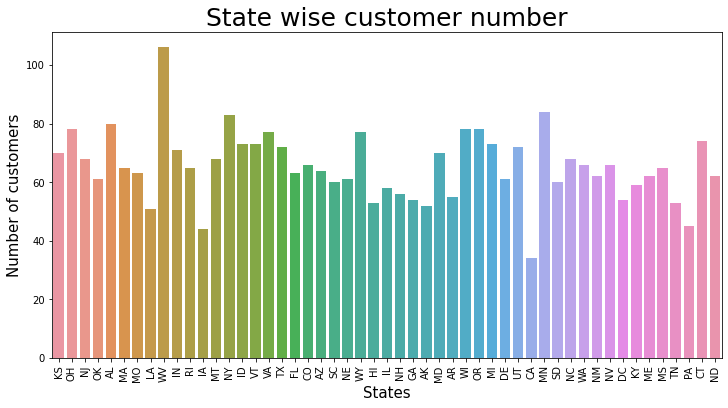

In [ ]:
# Creating plot between states and number of customers 
sns.countplot(x = telco_df['State'])
plt.rcParams['figure.figsize'] = (12,6)
plt.title('State wise customer number',fontsize=25)
plt.xlabel('States', fontsize=15)
plt.xticks (rotation= 90) 
plt.ylabel('Number of customers', fontsize=15)
plt.show()

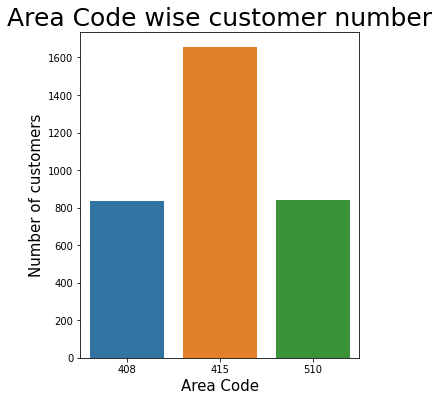

In [ ]:
#  Finding Area Code Wise Customer number
sns.countplot(x = telco_df['Area code'])
plt.rcParams['figure.figsize'] = (5,6)
plt.title('Area Code wise customer number',fontsize=25)
plt.xlabel('Area Code', fontsize=15)
plt.ylabel('Number of customers', fontsize=15)
plt.show()

In [136]:
# mean of account length
mean_account_length = telco_df['Account length'].mean()
regular_customer = telco_df.loc[telco_df['Account length']>mean_account_length]
new_comers = telco_df.loc[telco_df['Account length']<mean_account_length]


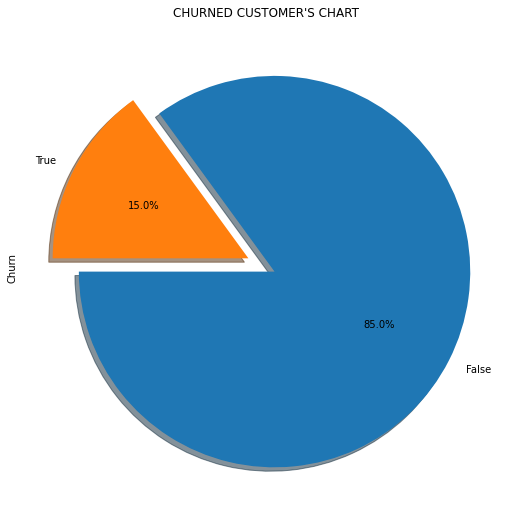

In [137]:
regular_customer ['Churn'].value_counts().plot.pie(explode=[0.05,0.1],autopct='%1.1f%%',startangle=180,shadow=True,figsize=(9,9))
plt.title("CHURNED CUSTOMER'S CHART")
plt.show()

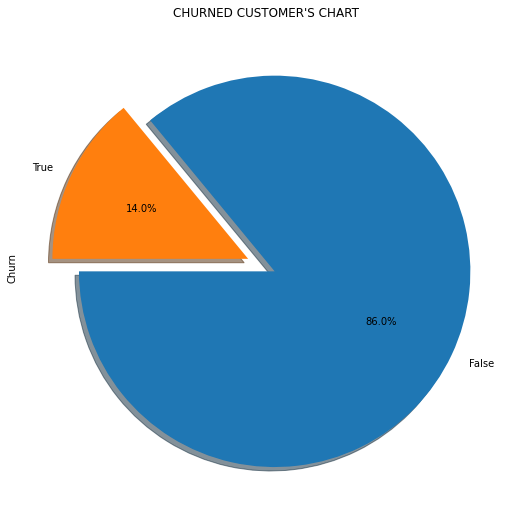

In [138]:
new_comers ['Churn'].value_counts().plot.pie(explode=[0.05,0.1],autopct='%1.1f%%',startangle=180,shadow=True,figsize=(9,9))
plt.title("CHURNED CUSTOMER'S CHART")
plt.show()

In [ ]:
telco_df['International plan'].value_counts()

No     3010
Yes     323
Name: International plan, dtype: int64

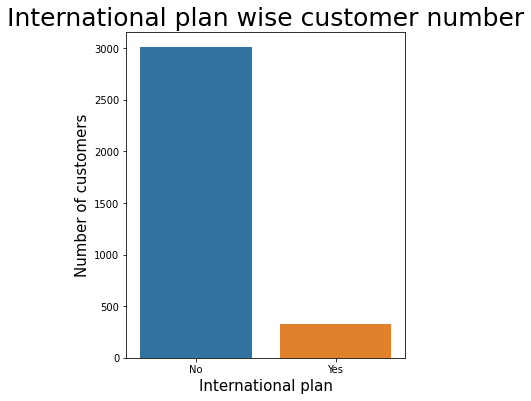

In [118]:
# with international plan and with no international plan
sns.countplot(x = telco_df['International plan'])
plt.rcParams['figure.figsize'] = (5,6)
plt.title('International plan wise customer number',fontsize=25)
plt.xlabel('International plan', fontsize=15)
plt.ylabel('Number of customers', fontsize=15)
plt.show()

In [ ]:
telco_df['Voice mail plan'].value_counts()

No     2411
Yes     922
Name: Voice mail plan, dtype: int64

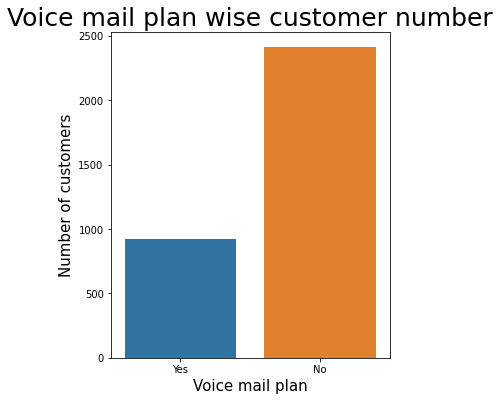

In [119]:
# with Voice mail plan and with no Voice mail plan
sns.countplot(x = telco_df['Voice mail plan'])
plt.rcParams['figure.figsize'] = (5,6)
plt.title('Voice mail plan wise customer number',fontsize=25)
plt.xlabel('Voice mail plan', fontsize=15)
plt.ylabel('Number of customers', fontsize=15)
plt.show()

In [ ]:
charges = telco_df['Total day charge'].sum(),telco_df['Total eve charge'].sum(),telco_df['Total night charge'].sum(),telco_df['Total intl charge'].sum()
charges

(101864.17000000001, 56939.44, 30128.07, 9214.349999999999)

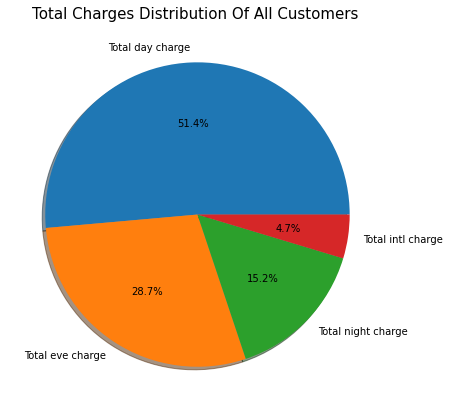

In [ ]:
fig = plt.figure(figsize = (10, 7))
plt.pie(charges, labels = ['Total day charge', 'Total eve charge' , 'Total night charge' , 'Total intl charge' ],
        autopct ='%1.1f%%',
        shadow = True )
plt.title('Total Charges Distribution Of All Customers ',size = 15 )
plt.show()

In [ ]:
#LET'S FIND OUT NUMBER OF VALUES A UNIQUE ITEM HOLD
Total_churn_values=(telco_df.Churn.value_counts())
print(Total_churn_values)

False    2850
True      483
Name: Churn, dtype: int64


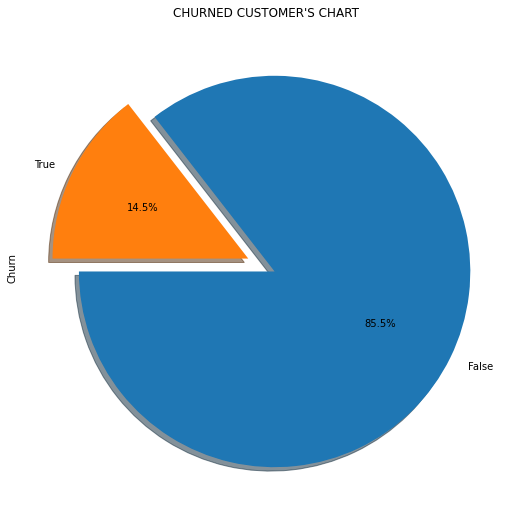

In [ ]:
# SO LET'S MAKE A PIE CHART FOR THE BETTER UNDERSTANDING OF HOW MANY PERCENTAGE OF CUSTOMERS GET CHURNED.
telco_df ['Churn'].value_counts().plot.pie(explode=[0.05,0.1],autopct='%1.1f%%',startangle=180,shadow=True,figsize=(9,9))
plt.title("CHURNED CUSTOMER'S CHART")
plt.show()

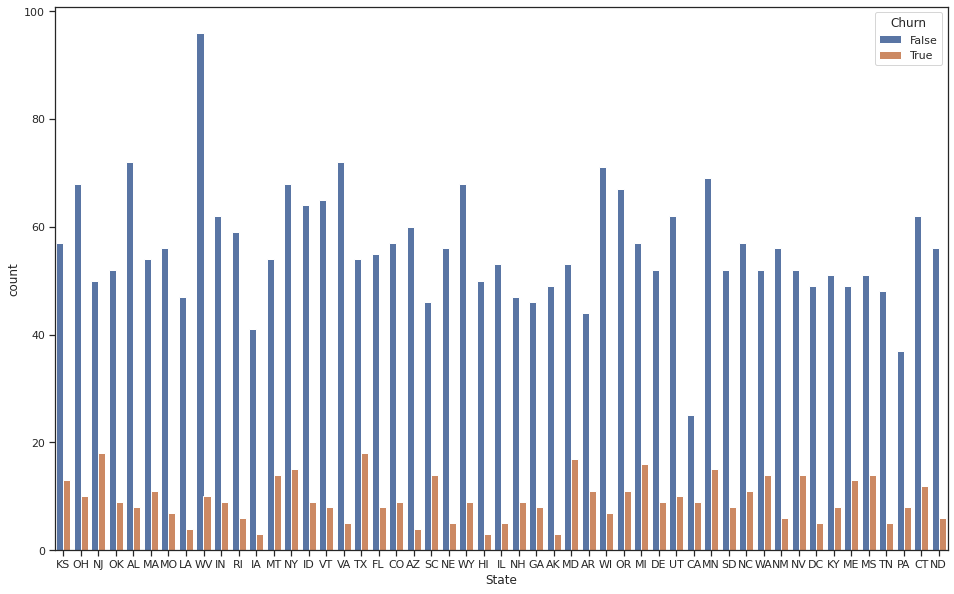

In [ ]:
#SO HERE WE USE STATE COLOUMN TO DO COMAPRISSION LIKE WHICH STATE VS CHURNED CUSTOMERS
sns.set(style='ticks')
plt.figure(figsize=(16,10))
ax=sns.countplot(x='State',hue='Churn',data=telco_df)
plt.show()

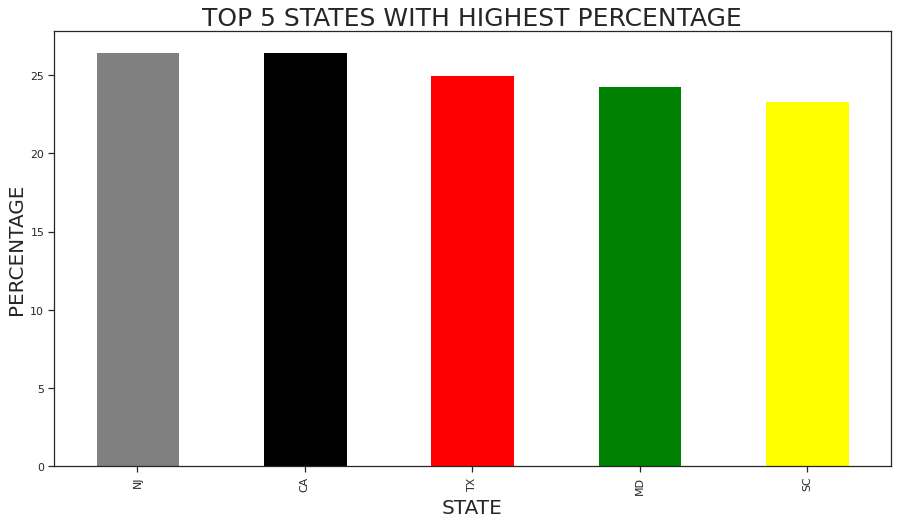

In [ ]:
plt.rcParams['figure.figsize'] = (15, 8)
color = plt.cm.copper(np.linspace(0, 1, 15))
((telco_df.groupby(['State'])['Churn'].mean())*100).sort_values(ascending =False).head(5).plot.bar(color = ['grey','black','red','green','yellow'])
plt.title("TOP 5 STATES WITH HIGHEST PERCENTAGE", fontsize = 25)
plt.xlabel('STATE', fontsize = 20)
plt.ylabel('PERCENTAGE', fontsize = 20)
plt.show()

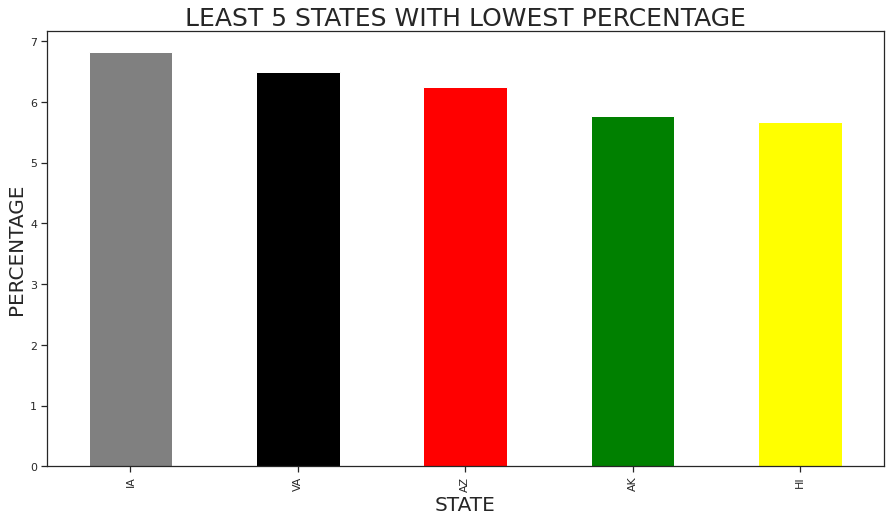

In [ ]:
plt.rcParams['figure.figsize'] = (15, 8)
color = plt.cm.copper(np.linspace(0, 1, 15))
((telco_df.groupby(['State'])['Churn'].mean())*100).sort_values(ascending =False).tail(5).plot.bar(color = ['grey','black','red','green','yellow'])
plt.title("LEAST 5 STATES WITH LOWEST PERCENTAGE", fontsize = 25)
plt.xlabel('STATE', fontsize = 20)
plt.ylabel('PERCENTAGE', fontsize = 20)
plt.show()

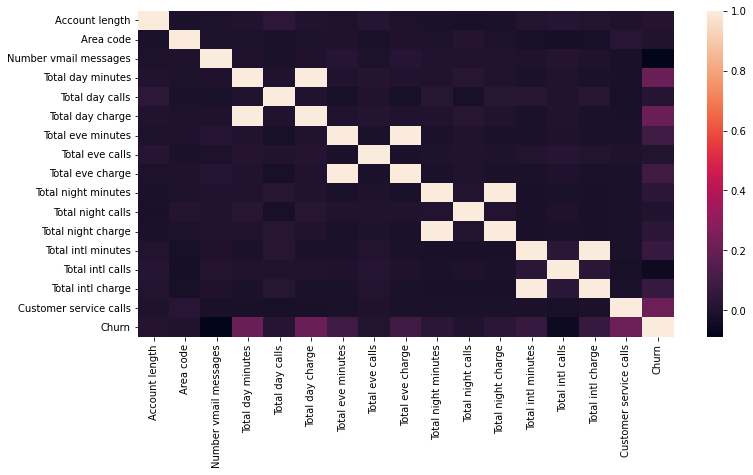

In [ ]:
sns.heatmap(telco_df.corr())

In [ ]:
def relation_bar(x,y):
    
    telco_df.groupby([x,y]).size().unstack(level=-1).plot.bar()
    plt.rcParams['figure.figsize'] = (15,7)
    plt.xlabel( x ,fontsize = 25)
    plt.ylabel( y +' '+'count',fontsize = 25)
    plt.title("Analyzing" +' '+ y +' '+ "With" +' '+ x ,fontsize = 25)
    plt.show()

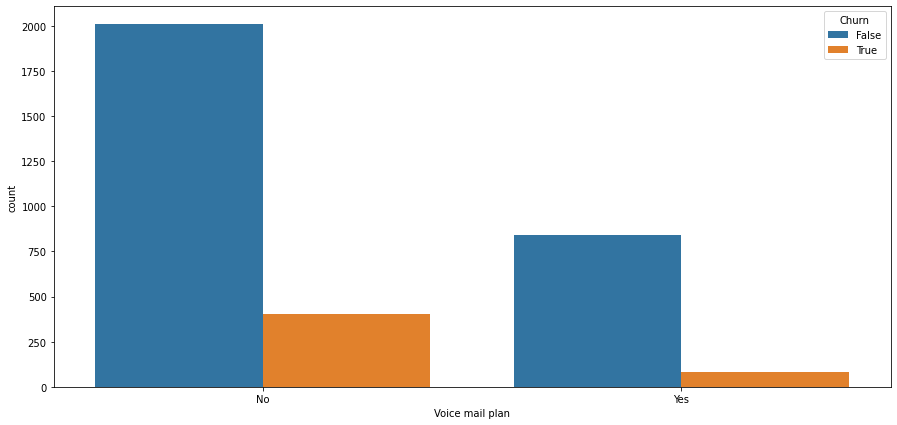

In [ ]:
sns.countplot(x='Voice mail plan', hue='Churn', data=telco_df, order = telco_df['Voice mail plan'].value_counts().index);

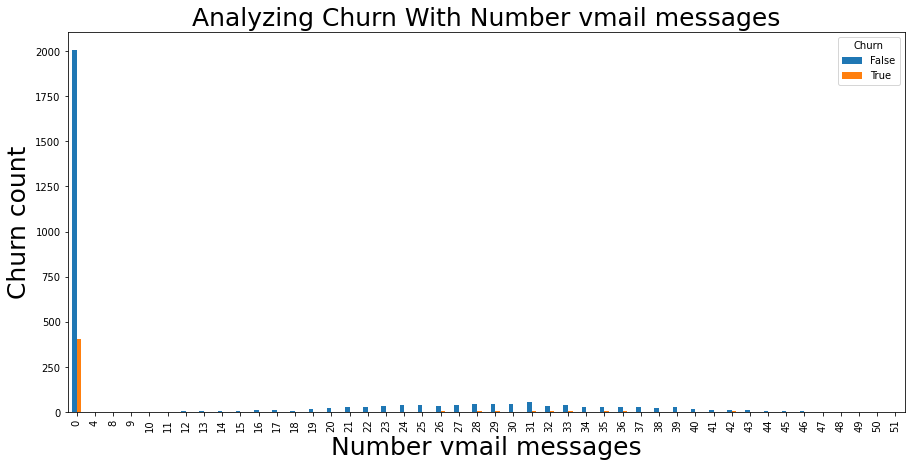

In [ ]:
relation_bar('Number vmail messages','Churn')

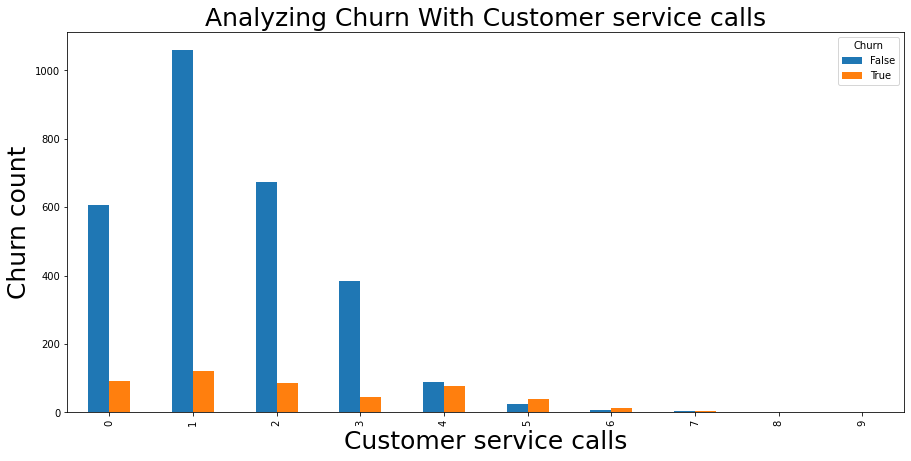

In [ ]:
relation_bar('Customer service calls','Churn')

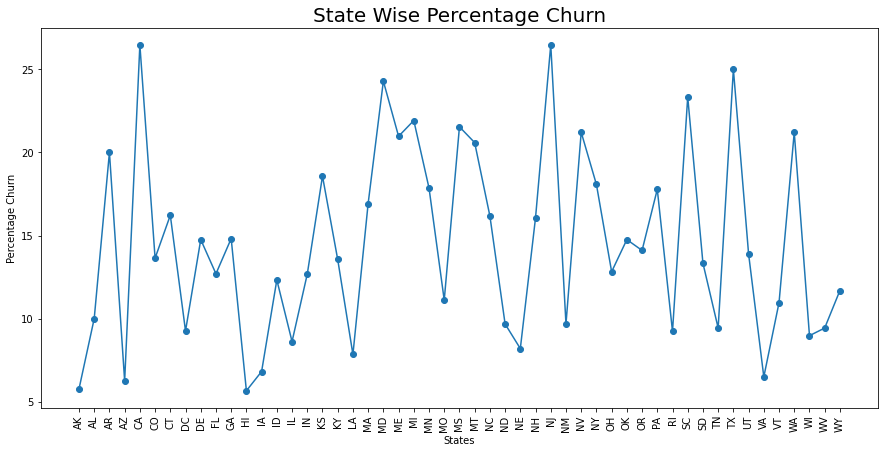

In [ ]:
State_data = pd.crosstab(telco_df["State"],telco_df["Churn"])
State_data['Percentage_Churn'] = State_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
plt.rcParams['figure.figsize'] = (15,7)
plt.plot(State_data['Percentage_Churn'],marker='o')
plt.xlabel('States', size = 10)
plt.ylabel('Percentage Churn',size = 10)
plt.title('State Wise Percentage Churn', size= 20)
plt.xticks (rotation=90)
plt.show()

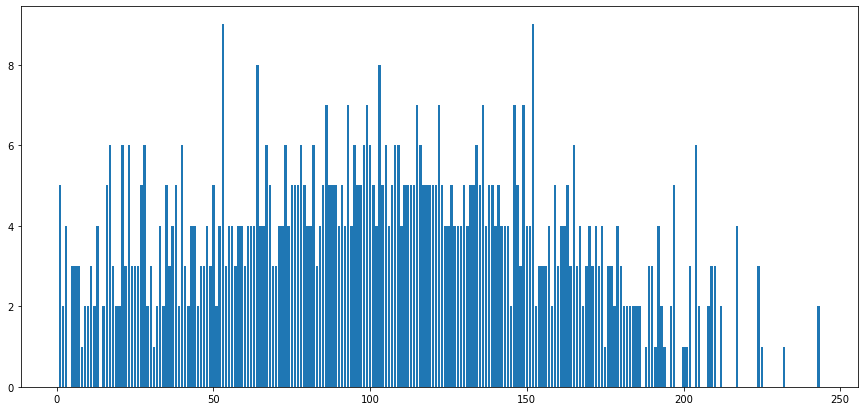

In [ ]:
plt.bar(telco_df["Account length"], telco_df["Customer service calls"])
plt.rcParams['figure.figsize'] = (15,7)

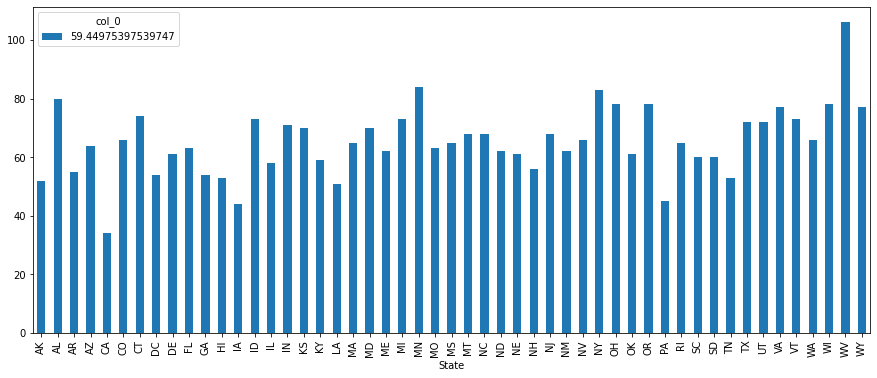

In [127]:
avg_total_value = pd.crosstab(telco_df['State'],telco_df['Total charge'].mean())
avg_total_value.plot.bar()
plt.rcParams['figure.figsize'] = (15,6)
plt.show()

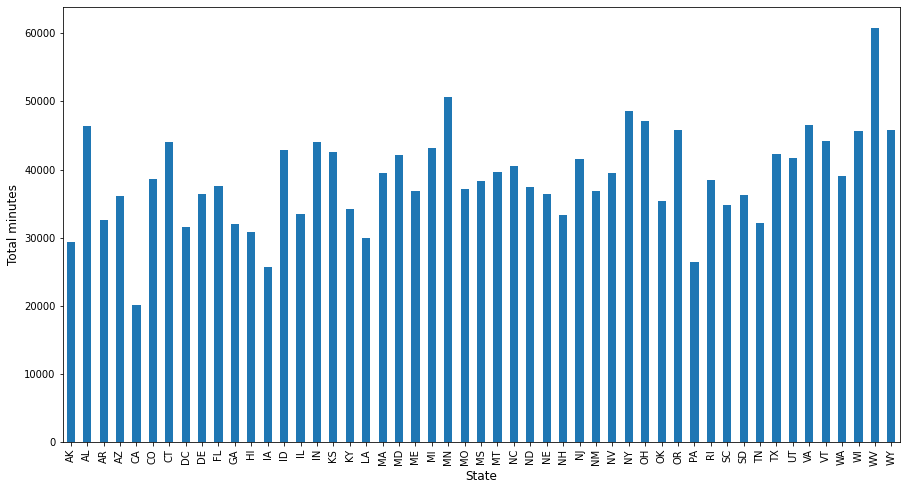

In [ ]:
telco_df['Total minutes'] = telco_df['Total day minutes'] + telco_df['Total eve minutes'] + telco_df['Total night minutes'] + telco_df['Total intl minutes']
telco_df.groupby('State')['Total minutes'].sum()
plt.figure(figsize=(15, 8))
telco_df.groupby('State')['Total minutes'].sum().plot.bar()
plt.xlabel("State", size=12)
plt.ylabel("Total minutes", size=12)
plt.show()

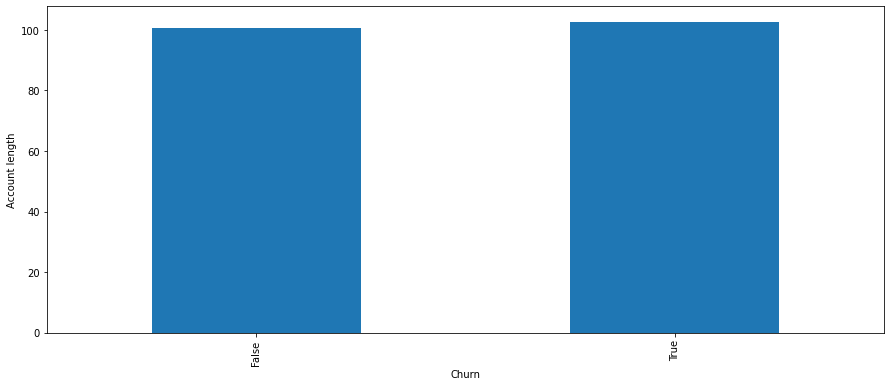

In [128]:
telco_df.groupby('Churn')['Account length'].mean().plot(kind='bar') 
plt.ylabel('Account length') 
plt.show();

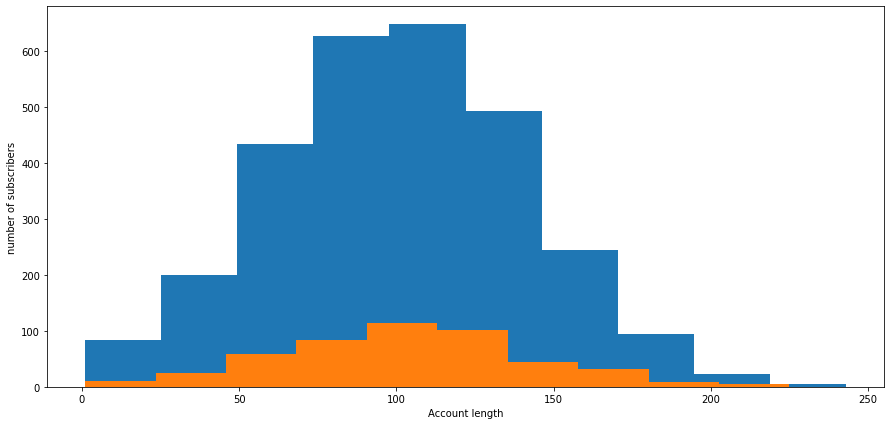

In [ ]:

telco_df.groupby('Churn')['Account length'].plot.hist()
plt.xlabel('Account length') 
plt.ylabel('number of subscribers')
plt.show();

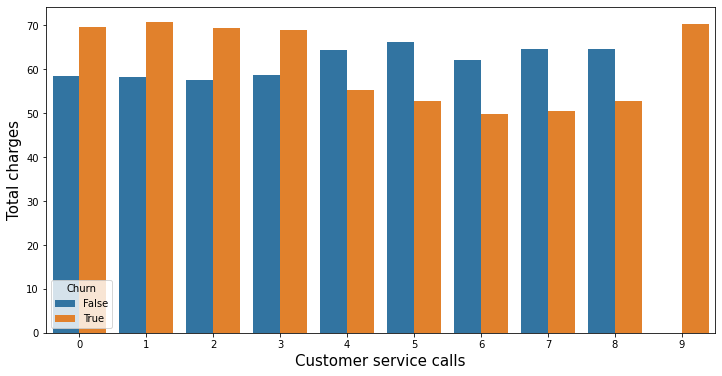

In [ ]:
telco_df['Total charge'] = telco_df['Total day charge'] + telco_df['Total eve charge'] + telco_df['Total night charge'] + telco_df['Total intl charge']
plt.figure(figsize=(12,6))
sns.barplot(data = telco_df, x = 'Customer service calls', y = 'Total charge', hue = 'Churn', ci = False)
plt.xlabel('Customer service calls', fontsize = 15)
plt.ylabel('Total charges', fontsize = 15)
plt.show()

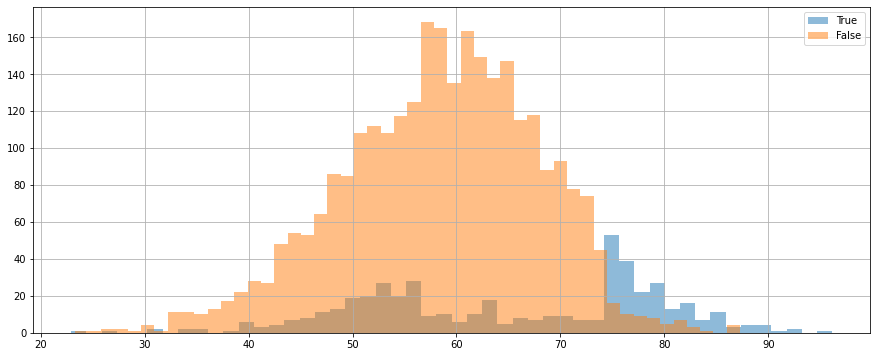

In [129]:
true = telco_df.loc[telco_df['Churn']==True]
false = telco_df.loc[telco_df['Churn']==False]
true['Total charge'].hist(bins = 50 ,alpha = 0.5, label = 'True' )
false['Total charge'].hist(bins = 50 ,alpha = 0.5, label = 'False' )
plt.legend()
plt.show()

In [134]:
telco_df['Regular charge'] = telco_df['Total day charge'] + telco_df['Total eve charge'] + telco_df['Total night charge']
telco_df['Total regular minute']= telco_df['Total day minutes'] + telco_df['Total eve minutes'] + telco_df['Total night minutes']
telco_df['charge per minute'] = (telco_df['Total day charge'] + telco_df['Total eve charge'] + telco_df['Total night charge'])/ (telco_df['Total day minutes'] + telco_df['Total eve minutes'] + telco_df['Total night minutes'])
telco_df['intl charge per minute'] = telco_df['Total intl charge'] / telco_df['Total intl minutes']

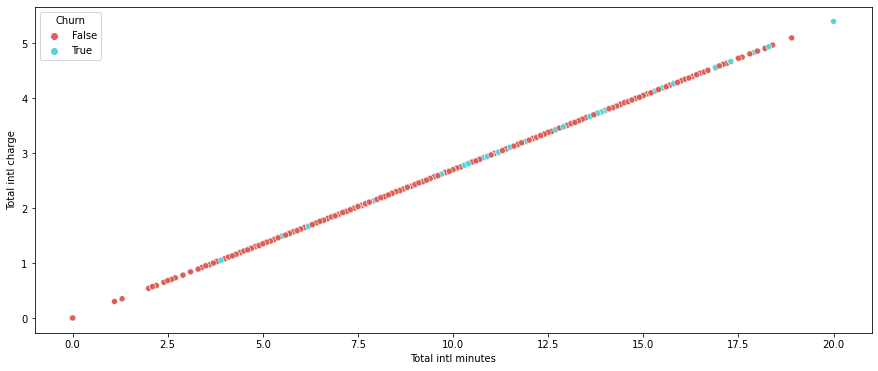

In [130]:
sns.scatterplot(x="Total intl minutes", y="Total intl charge", hue="Churn", data=telco_df,palette='hls')

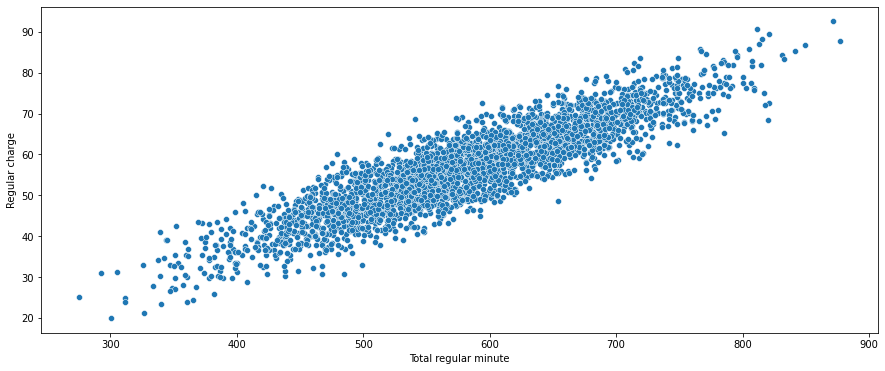

In [131]:
sns.scatterplot(x="Total regular minute",y=  "Regular charge", data=telco_df,palette='hls')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'State')

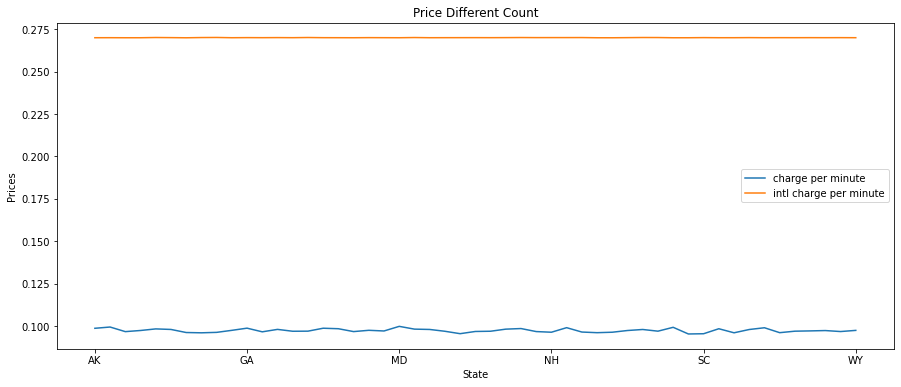

In [135]:
charges = telco_df.groupby(['State'])['charge per minute', 'intl charge per minute'].mean()
charges.plot()
plt.title('Price Different Count')
plt.ylabel('Prices')
plt.xlabel('State')